# UUUU

In [16]:
NTRIAL = 5

In [22]:
testcases = ((0.05, 0.00001),
             (0.04, 0.00001),
             (0.02, 0.00001),
             (0.01, 0.00001),
             (0.005, 0.00001),
             (0.002, 0.00001),
             (0.001, 0.00001),
             (0.05, 0.000015),
             (0.04, 0.000015),)

In [13]:
import os

for tc in testcases:
    
    path_tc = "uuuu_%5.3f_%8.6f" % tc
    if not os.path.isdir(path_tc):
        os.mkdir(path_tc)

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        if not os.path.isdir(path):
            os.mkdir(path)

        fout = open("%s/uuuu.inp" % (path,),'w')
        for l in open("uuuu_template.inp"):
            l = l.replace("##PATH##", path)
            l = l.replace("##STEP##", "10000000")
            l = l.replace("##STEPSIZE##", "%f" % tc[0])
            l = l.replace("##VISCOSITY##", "%f" % tc[1])
            l = l.replace("##SEED##", "%i" % (11000 + itrial))
            fout.write(l)
        fout.close()

In [18]:
import subprocess
import os

for tc in testcases:
    
    path_tc = "uuuu_%5.3f_%8.6f" % tc

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        
        fout = open(path+'/out','w')
        ferr = open(path+'/err','w')
        subprocess.call(['../md', path+'/uuuu.inp'], stdout=fout, stderr=ferr)
        fout.close()
        ferr.close()
        
        # Delete the ts file to save the disc
        os.remove(path+'/uuuu.ts')

In [23]:
import numpy as np

mean_std_trials = {}
for tc in testcases:
    
    path_tc = "uuuu_%5.3f_%8.6f" % tc

    trials = []
    for itrial in range(NTRIAL):
        
        path = path_tc + "/%03i" % itrial
        
        d = []
        for l in open(path+'/uuuu.T'):
            Tk = float(l.split()[1])
            d.append(Tk)
            
        trials.append((np.mean(d), np.std(d)))
    
    mean_std_trials[tc] = trials

In [24]:
mean_std_trials

{(0.05, 1e-05): [(284.2895457141996, 70.00946643756077),
  (284.2681567168, 69.91329380438005),
  (284.2168534783003, 69.92358304051892),
  (284.1819150145, 69.96156005414684),
  (284.19320247200045, 70.04654926266605)],
 (0.04, 1e-05): [(287.49092756239986, 70.77354484848199),
  (287.51313879089963, 70.69624272093198),
  (287.43243328669996, 70.72264840775796),
  (287.3952808032995, 70.7108483184556),
  (287.4137746522003, 70.84784297272736)],
 (0.02, 1e-05): [(293.87058087949987, 72.29123733861927),
  (293.85232493230046, 72.30038356935586),
  (293.8022733332996, 72.30279610133121),
  (293.84118502129996, 72.23988347964763),
  (293.7133735757002, 72.43350527928588)],
 (0.01, 1e-05): [(297.0807143947998, 73.08593892401294),
  (297.0015808966999, 73.14615519660049),
  (296.84561887909973, 73.02401426497185),
  (296.8883735684, 73.06428172418116),
  (296.7004037250997, 73.09502229584629)],
 (0.005, 1e-05): [(298.71890524909963, 73.47812482410413),
  (298.73612797119995, 73.4782678121955

In [51]:

from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:80% !important; }</style>")) 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as mpatches
import numpy as np

plt.rc('text', usetex=True)  # To use bold font in LaTex
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"] #To use bold font in LaTex
plt.rcParams['figure.autolayout']=True
plt.rcParams['figure.figsize'] = 4, 3
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] ='sans-serif' #使用するフォントファミリー
plt.rcParams['font.serif'] = ['Tahoma']
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica']  #使用するフォント(探す順序)
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 8 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.05
plt.rcParams['savefig.transparent'] = True

Text(0, 0.5, 'Kinetic temperature')

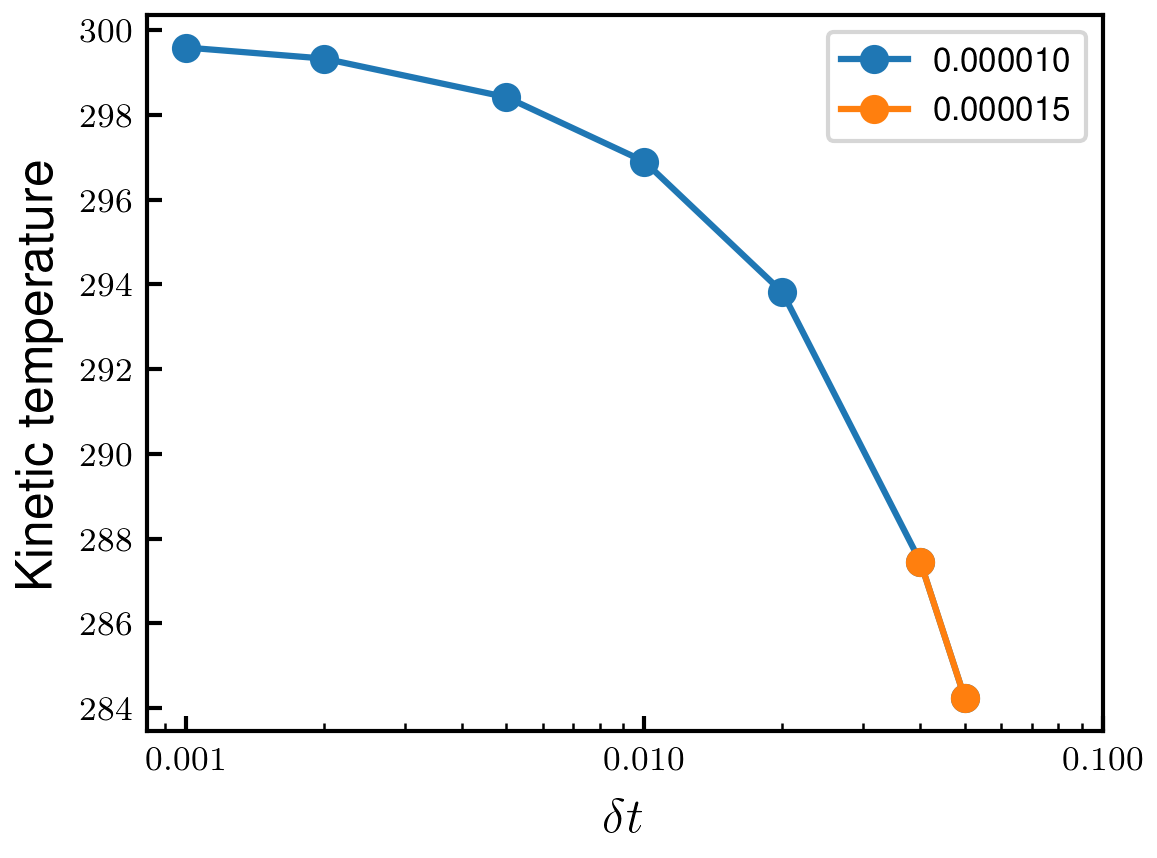

In [52]:
fig, axs = plt.subplots(1,1)

ax = axs

ax.plot()

viscs = set()
for tc in testcases:
    if tc[1] not in viscs:
        viscs.add(tc[1])
    
for visc in viscs:
    
    time_step_sizes = []
    mean_Ts = []
    std_Ts = []
    
    for tc in testcases:
        if tc[1] != visc:
            continue
        
        trials = mean_std_trials[tc]
        
        m = np.mean([t[0] for t in trials])
        s = np.mean([t[1] for t in trials])
    
        time_step_sizes.append(tc[0])
        mean_Ts.append(m)
        std_Ts.append(s)
    
    ax.plot(time_step_sizes, mean_Ts, '-o', label='%f' % visc)
    
ax.set_xscale('log')
ax.set_xticks([0.001, 0.01, 0.1])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter()) # This set ticklabels automatically.
#ax.set_xticklabels(('0.1','1','10')) # If you want to set labels manually.

ax.legend()

ax.set_xlabel(r'$\delta t$', fontsize=12)
ax.set_ylabel(r'Kinetic temperature', fontsize=12)

# Azo

In [7]:
NTRIAL = 2

In [8]:
testcases = ((0.05, 0.00001),)

In [11]:
import os

for tc in testcases:
    
    path_tc = "azo_%5.3f_%8.6f" % tc
    if not os.path.isdir(path_tc):
        os.mkdir(path_tc)

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        if not os.path.isdir(path):
            os.mkdir(path)

        fout = open("%s/azo.inp" % (path,),'w')
        for l in open("azo_template.inp"):
            l = l.replace("##PATH##", path)
            l = l.replace("##STEP##", "100000")
            l = l.replace("##STEPSIZE##", "%f" % tc[0])
            l = l.replace("##VISCOSITY##", "%f" % tc[1])
            l = l.replace("##SEED##", "%i" % (11000 + itrial))
            fout.write(l)
        fout.close()

In [13]:
import subprocess
import os

for tc in testcases:
    
    path_tc = "azo_%5.3f_%8.6f" % tc

    for itrial in range(NTRIAL):

        path = path_tc + "/%03i" % itrial
        
        fout = open(path+'/out','w')
        ferr = open(path+'/err','w')
        subprocess.call(['../../md', path+'/azo.inp'], stdout=fout, stderr=ferr)
        fout.close()
        ferr.close()
        
        # Delete the ts file to save the disc
        #os.remove(path+'/azo.ts')

In [14]:
import numpy as np

mean_std_trials = {}
for tc in testcases:
    
    path_tc = "azo_%5.3f_%8.6f" % tc

    trials = []
    for itrial in range(NTRIAL):
        
        path = path_tc + "/%03i" % itrial
        
        d = []
        for il, l in enumerate(open(path+'/azo.T')):
            if il < 1000:
                continue
            Tk = float(l.split()[1])
            d.append(Tk)
            
        trials.append((np.mean(d), np.std(d)))
    
    mean_std_trials[tc] = trials

In [15]:
mean_std_trials

{(0.05, 1e-05): [(309.19071236529277, 6.912725705277489),
  (310.2710772136429, 6.918438329070958)]}